# Variation of Magnitudes bias vrt Airmass

- author Sylvie Dagoret-Campagne

In [1]:
import pandas as pd
import numpy as np
import os,sys
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline
from scipy.interpolate import interp1d

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [3]:
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")


Bad key "axes.color_cycle" on line 215 in
templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Variation with respect to pwv

In [6]:
am= [1.,1.2, 1.4,1.6,1.8,2.0]

In [7]:
pwv=[5.05,4.95,4.84,4.84,4.74,4.74]

In [8]:
np.mean(pwv)

4.86

In [9]:
err_pwv=0.75

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_2_10_0/python/miniconda3-4.5.4/envs/lsst-scipipe-fcd27eb/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


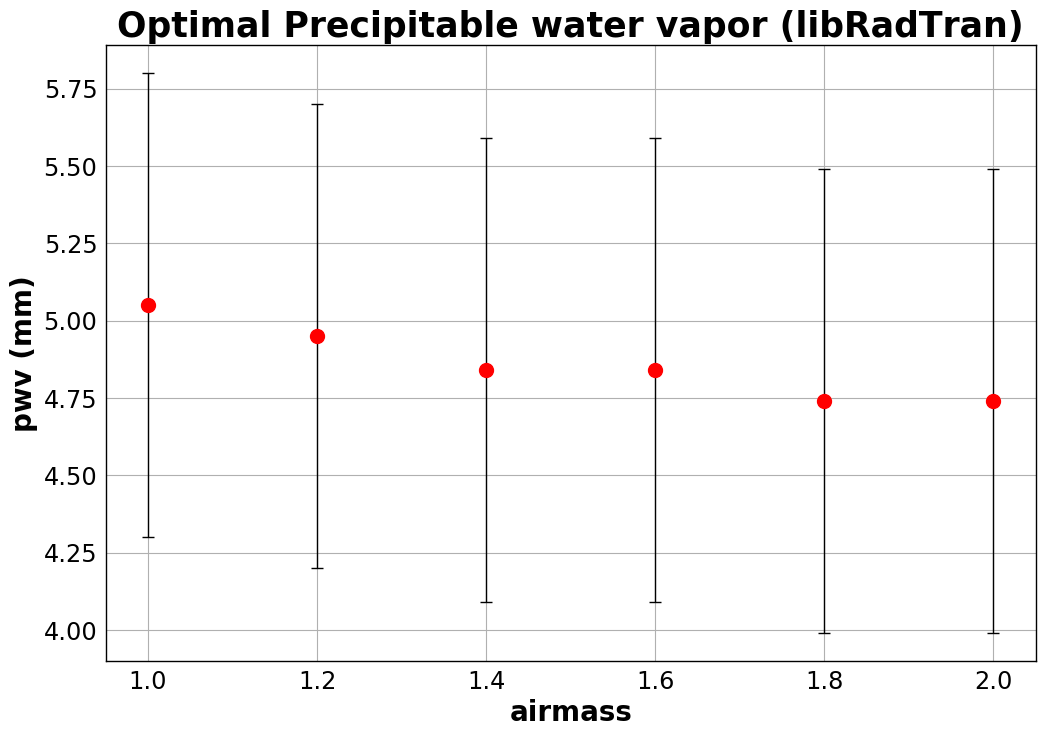

In [10]:
plt.errorbar(am,pwv,yerr=0.75,fmt='o',color='red',markersize='10', ecolor='black',capsize=4)
plt.grid()
plt.xlabel("airmass",fontweight='bold',fontsize=20)
plt.ylabel("pwv (mm)",fontweight='bold',fontsize=20)
plt.title("Optimal Precipitable water vapor (libRadTran)",fontweight='bold',fontsize=25)
plt.grid(True)

# Variation with respect to ozone

In [11]:
am= [1.,1.2, 1.4,1.6,1.8,2.0]

In [12]:
#o3=[346.9,350.0,341.1,339.2,339.2,335.3]
o3=[346.9,343.5,341.1,339.2,339.2,335.3]  # correct value for z=1.2

In [13]:
np.mean(o3)

340.8666666666667

In [14]:
err_o3=50.

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_2_10_0/python/miniconda3-4.5.4/envs/lsst-scipipe-fcd27eb/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


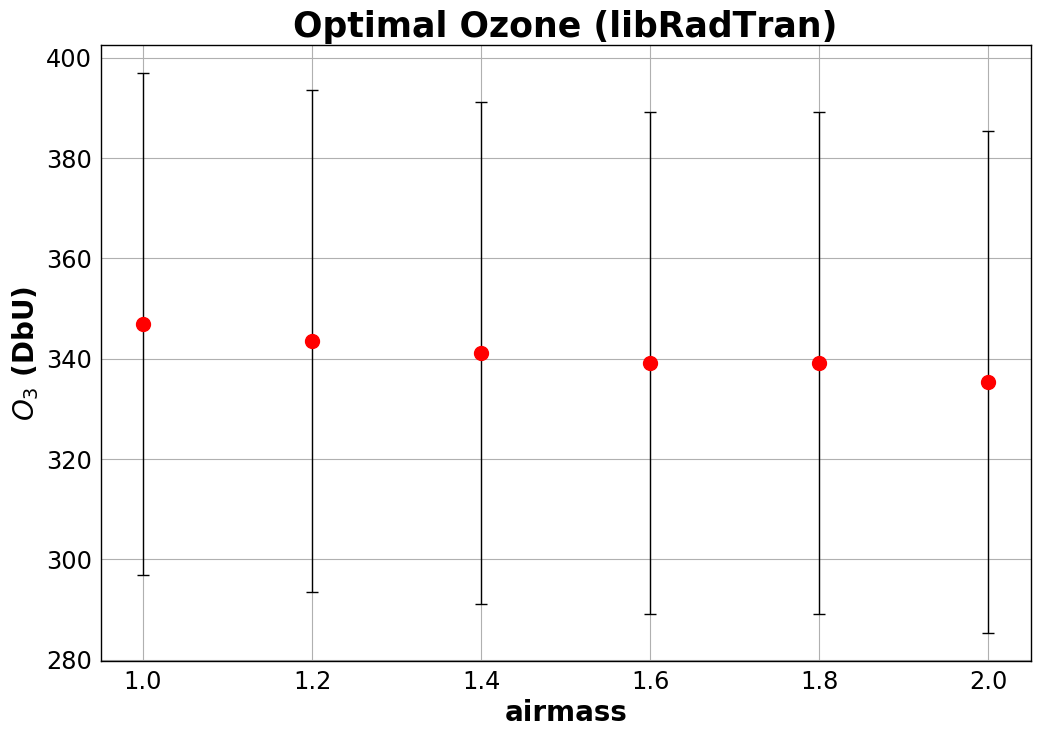

In [15]:
plt.errorbar(am,o3,yerr=err_o3,fmt='o',color='red',markersize='10', ecolor='black',capsize=4)
plt.grid()
plt.xlabel("airmass",fontweight='bold',fontsize=20)
plt.ylabel("$O_3$ (DbU)",fontweight='bold',fontsize=20)
plt.title("Optimal Ozone (libRadTran)",fontweight='bold',fontsize=25)
plt.grid(True)

# Delta M

In [16]:
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=len(am))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

# z 1,1.2,1.4,1.6,1.8,2.0

In [17]:
Delta_M_pwv_Y=[0.78,0.28,0.54,0.72,1.02,-0.09]
Err_M_pwv_Y=[0.19,0.19,0.19,0.22,0.2,0.22]

Delta_M_pwv_Z=[0.81,1.06,1.34,1.06,1.59,1.28]
Err_M_pwv_Z=[0.07,0.07,0.07,0.09,0.08,0.09]

Delta_M_pwv_I=[5.16,5.19,5.18,4.92,5.15,4.83]
Err_M_pwv_I=[0.27,0.31,0.34,0.37,0.4,0.41]

Delta_M_pwv_R=[4.37,5.06,5.57,6.04,6.76,6.96]
Err_M_pwv_R=[0.09,0.09,0.08,0.08,0.08,0.08]


/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_2_10_0/python/miniconda3-4.5.4/envs/lsst-scipipe-fcd27eb/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


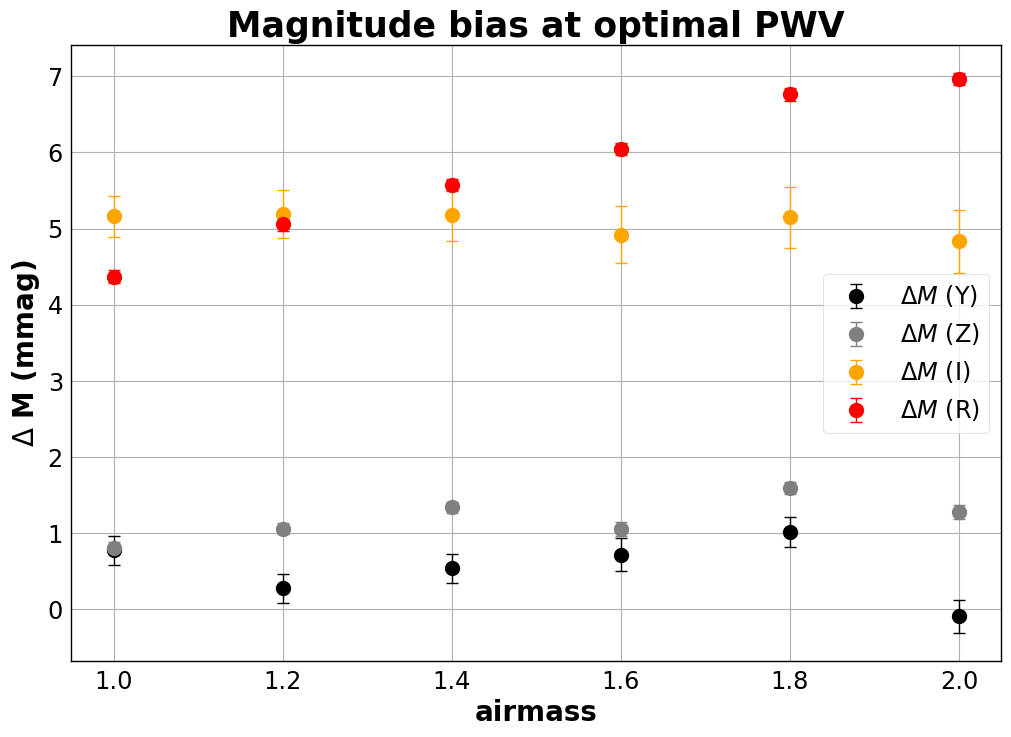

In [18]:
plt.errorbar(am,Delta_M_pwv_Y,yerr=Err_M_pwv_Y,fmt='o',color='black',markersize='10', ecolor='black',capsize=4,label="$\Delta M$ (Y)")
plt.errorbar(am,Delta_M_pwv_Z,yerr=Err_M_pwv_Z,fmt='o',color='grey',markersize='10', ecolor='grey',capsize=4,label="$\Delta M$ (Z)")
plt.errorbar(am,Delta_M_pwv_I,yerr=Err_M_pwv_I,fmt='o',color='orange',markersize='10', ecolor='orange',capsize=4,label="$\Delta M$ (I)")
plt.errorbar(am,Delta_M_pwv_R,yerr=Err_M_pwv_R,fmt='o',color='red',markersize='10', ecolor='red',capsize=4,label="$\Delta M$ (R)")
plt.grid()
plt.xlabel("airmass",fontweight='bold',fontsize=20)
plt.ylabel("$\Delta$ M (mmag)",fontweight='bold',fontsize=20)
plt.title("Magnitude bias at optimal PWV",fontweight='bold',fontsize=25)
plt.grid(True)
plt.legend()

In [19]:
Delta_M_o3_U=[1.83,2.18,1.9,1.74,2.63,1.46]
Err_M_o3_U=[0.02,0.03,0.3,0.3,0.05,0.03]

Delta_M_o3_G=[0.,0.15,0.08,0.05,0.17,0.08]
Err_M_o3_G=[0.06,0.09,0.05,0.03,0.04,0.05]

Delta_M_o3_R=[0.04,0.22,0.06,0.2,0.14,0.33]
Err_M_o3_R=[0.26,0.3,0.28,0.27,0.28,0.27]

Delta_M_o3_I=[4.79,4.44,4.13,3.81,3.55,3.16]
Err_M_o3_I=[0.24,0.26,0.29,0.31,0.33,0.34]

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_2_10_0/python/miniconda3-4.5.4/envs/lsst-scipipe-fcd27eb/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


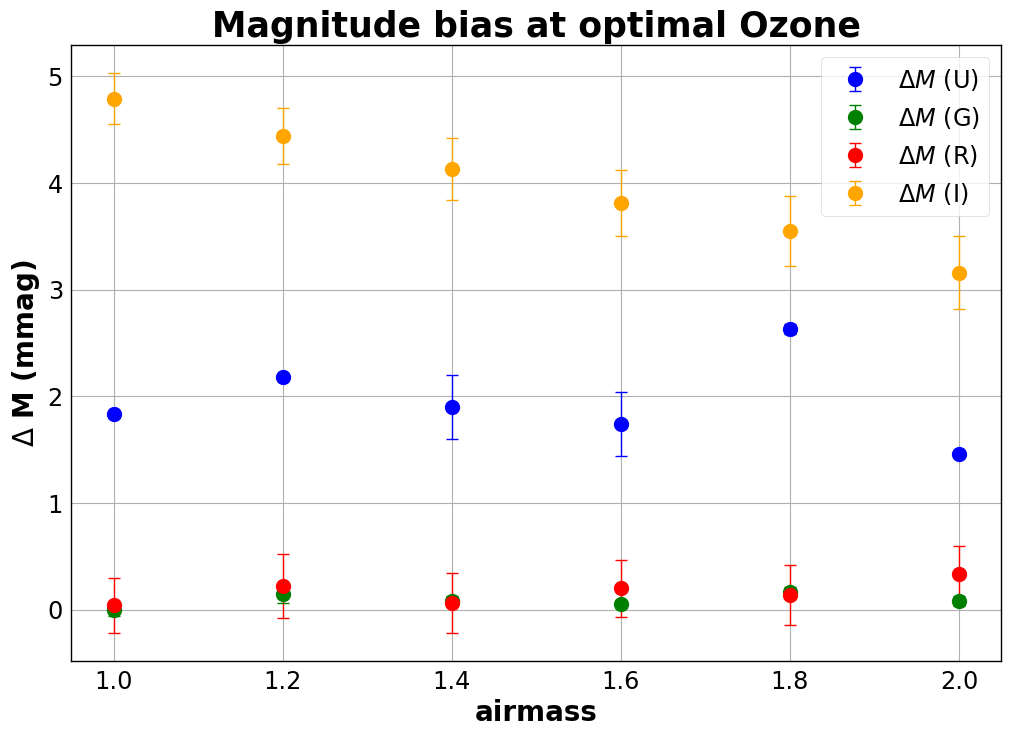

In [20]:
plt.errorbar(am,Delta_M_o3_U,yerr=Err_M_o3_U,fmt='o',color='blue',markersize='10', ecolor='blue',capsize=4,label="$\Delta M$ (U)")
plt.errorbar(am,Delta_M_o3_G,yerr=Err_M_o3_G,fmt='o',color='green',markersize='10', ecolor='green',capsize=4,label="$\Delta M$ (G)")
plt.errorbar(am,Delta_M_o3_R,yerr=Err_M_o3_R,fmt='o',color='red',markersize='10', ecolor='red',capsize=4,label="$\Delta M$ (R)")
plt.errorbar(am,Delta_M_o3_I,yerr=Err_M_o3_I,fmt='o',color='orange',markersize='10', ecolor='orange',capsize=4,label="$\Delta M$ (I)")
plt.grid()
plt.xlabel("airmass",fontweight='bold',fontsize=20)
plt.ylabel("$\Delta$ M (mmag)",fontweight='bold',fontsize=20)
plt.title("Magnitude bias at optimal Ozone",fontweight='bold',fontsize=25)
plt.grid(True)
plt.legend()

In [21]:
z_mt=[1.0, 1.2,1.4,1.6,1.8,2.0]
z_rt=[1.099, 1.298,1.497,1.696,1.895,2.077]
err_z=[0.15,0.17,0.19,0.199,0.14,0.16]

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_2_10_0/python/miniconda3-4.5.4/envs/lsst-scipipe-fcd27eb/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


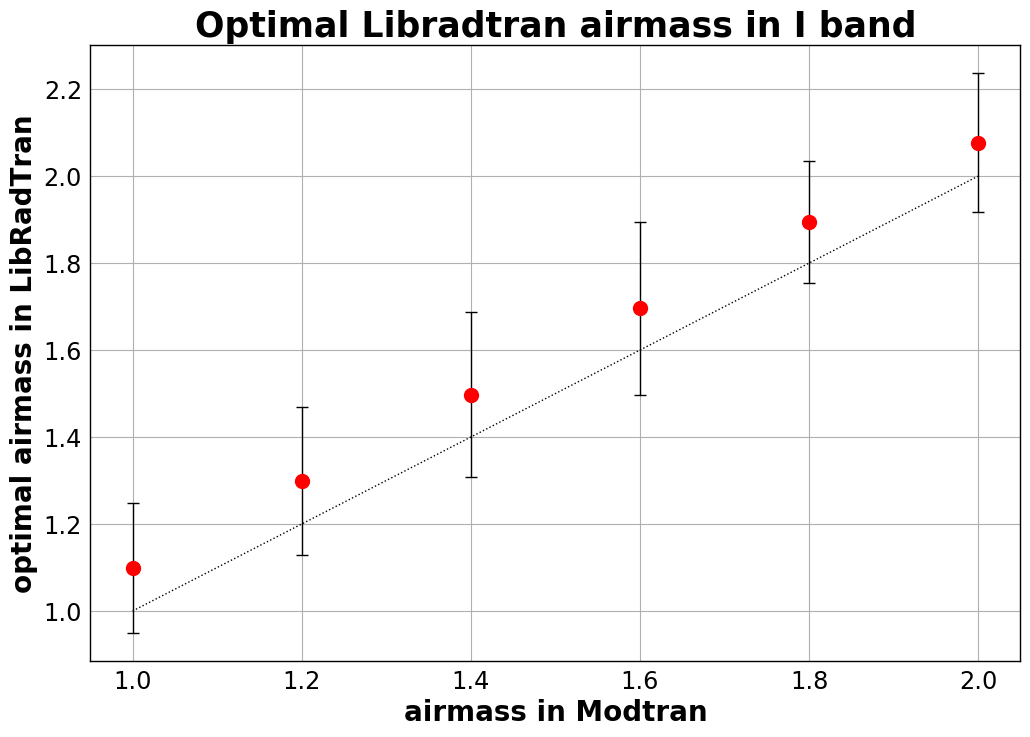

In [22]:
plt.errorbar(z_mt,z_rt,yerr=err_z,fmt='o',color='red',markersize='10', ecolor='black',capsize=4)
plt.plot([1,2],[1,2],'k:')
plt.grid()
plt.xlabel("airmass in Modtran",fontweight='bold',fontsize=20)
plt.ylabel("optimal airmass in LibRadTran",fontweight='bold',fontsize=20)
plt.title("Optimal Libradtran airmass in I band",fontweight='bold',fontsize=25)
plt.grid(True)

In [23]:
z_mt=np.array([1.0, 1.2,1.4,1.6,1.8,2.0])
z_rt=np.array([1.099, 1.298,1.497,1.696,1.895,2.077])


In [25]:
delta_z=z_rt-z_mt

In [26]:
delta_z.mean()

0.09366666666666668

In [27]:
delta_z.std()

0.007564537145273506